# Pandas (2)

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv("http://data.insideairbnb.com/italy/puglia/puglia/2023-09-24/visualisations/listings.csv")
df.head()

## Grouping and Sorting

### Grouping

In [7]:
df["neighbourhood"].value_counts()

Ostuni                    2804
Bari                      2622
Lecce                     2246
Gallipoli                 2195
Porto Cesareo             1972
                          ... 
Rignano Garganico            1
Casalvecchio di Puglia       1
Monteparano                  1
Castelluccio dei Sauri       1
San Marco la Catola          1
Name: neighbourhood, Length: 249, dtype: int64

In [17]:
df.groupby("neighbourhood")["price"].mean()
#df.groupby("neighbourhood").price.max()
#df.groupby("neighbourhood").price.min()
#df.groupby("neighbourhood").price.std()
#df.groupby("neighbourhood").price.count()

neighbourhood
Accadia                   36.666667
Acquarica del Capo        96.811321
Acquaviva delle Fonti    101.942857
Adelfia                   87.409091
Alberobello              166.719388
                            ...    
Vieste                   106.892045
Villa Castelli           144.062500
Volturino                 75.000000
Zapponeta                 73.000000
Zollino                  169.117647
Name: price, Length: 249, dtype: float64

In [25]:
df.groupby("neighbourhood").price.agg(["min", "max", "mean"])

,min,max,mean
neighbourhood,,,
Accadia,35,40,36.666667
Acquarica del Capo,17,420,96.811321
Acquaviva delle Fonti,25,500,101.942857
Adelfia,27,200,87.409091
Alberobello,31,1163,166.719388
...,...,...,...
Vieste,28,6946,106.892045
Villa Castelli,29,529,144.062500
Volturino,45,105,75.000000


In [27]:
df.groupby(["neighbourhood_group", "neighbourhood"]).price.agg(["min", "max", "mean"])

min   max        mean
neighbourhood_group neighbourhood                                     
Bari                Acquaviva delle Fonti         25   500  101.942857
                    Adelfia                       27   200   87.409091
                    Alberobello                   31  1163  166.719388
                    Altamura                      20  1000   84.129032
                    Bari                           9  4883  107.924867
...                                              ...   ...         ...
Taranto             San Marzano di San Giuseppe   55   120   87.625000
                    Sava                          45  1153  119.900000
                    Statte                        40   300  113.285714
                    Taranto                       20  2000   89.387372
                    Torricella                    25   485  117.008475

[249 rows x 3 columns]

In [28]:
# change to plain dataframe

df.groupby(["neighbourhood_group", "neighbourhood"]).price.agg(["min", "max", "mean"]).reset_index()

,neighbourhood_group,neighbourhood,min,max,mean
0,Bari,Acquaviva delle Fonti,25,500,101.942857
1,Bari,Adelfia,27,200,87.409091
2,Bari,Alberobello,31,1163,166.719388
3,Bari,Altamura,20,1000,84.129032
4,Bari,Bari,9,4883,107.924867
...,...,...,...,...,...
244,Taranto,San Marzano di San Giuseppe,55,120,87.625000
245,Taranto,Sava,45,1153,119.900000
246,Taranto,Statte,40,300,113.285714
247,Taranto,Taranto,20,2000,89.387372


In [29]:
df.groupby(["neighbourhood", "room_type"]).price.agg(["min", "max", "std", "mean", "count"]).reset_index()

,neighbourhood,room_type,min,max,std,mean,count
0,Accadia,Entire home/apt,40,40,NaN,40.000000,1
1,Accadia,Private room,35,35,0.000000,35.000000,2
2,Acquarica del Capo,Entire home/apt,17,420,80.950602,93.000000,45
3,Acquarica del Capo,Private room,86,200,35.317944,118.250000,8
4,Acquaviva delle Fonti,Entire home/apt,30,500,141.959553,136.529412,17
...,...,...,...,...,...,...,...
586,Zapponeta,Entire home/apt,54,130,31.107877,77.200000,5
587,Zapponeta,Private room,56,69,9.192388,62.500000,2
588,Zollino,Entire home/apt,25,560,151.375264,157.666667,18
589,Zollino,Private room,38,560,138.386146,199.571429,14


In [34]:
gb = df[df["neighbourhood_group"] == "Bari"].groupby(["neighbourhood", "room_type"]).price.agg(["mean", "count"]).reset_index()
gb[(gb["mean"] > 100) & (gb["count"] > 10)]

,neighbourhood,room_type,mean,count
0,Acquaviva delle Fonti,Entire home/apt,136.529412,17
5,Alberobello,Entire home/apt,171.911111,315
7,Alberobello,Private room,140.863014,73
12,Bari,Entire home/apt,111.893126,1862
13,Bari,Hotel room,133.500000,16
26,Casamassima,Entire home/apt,117.161290,31
28,Cassano delle Murge,Entire home/apt,106.163265,49
30,Castellana Grotte,Entire home/apt,210.090535,243
31,Castellana Grotte,Private room,117.870588,85
34,Conversano,Entire home/apt,143.129187,209


### Sorting

In [ ]:
df.sort_values(by="host_name").head(10)

In [ ]:
df.sort_values(by=["host_name", "neighbourhood_group"]).head(10)

In [ ]:
df.sort_values(by="price", ascending=False).head(10)

In [ ]:
df.sort_values(by=["neighbourhood_group", "price"], ascending=[True, False]).head(10)

### Exercises

In [ ]:
# By neighborhood, the mean availability of entire home/apt, sorted by mean availability descending
df[df["room_type"] == "Entire home/apt"].groupby("neighbourhood_group").availability_365.mean().reset_index().sort_values(by="availability_365", ascending=False)

In [65]:
# Get all the properties with a host that has more the 10 reviews in total
# tip: check the isin() dataframe function
host_id_list = df.groupby("host_id").number_of_reviews.sum().reset_index().query("number_of_reviews > 10")["host_id"].unique()
df[df["host_id"].isin(host_id_list)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,20009845,Home in Provincia di Lecce · ★4.81 · 3 bedroom...,3325119,Julien,Lecce,Castrignano del Capo,39.812110,18.328000,Entire home/apt,115,3,16,2023-09-10,0.21,8,25,3,NaN
4,924521740641122778,Home in Poggiardo · 2 bedrooms · 2 beds · 1 bath,26794110,Buena Onda,Lecce,Poggiardo,40.046419,18.375289,Entire home/apt,55,1,2,2023-09-15,1.25,124,176,2,LE07506191000035453
6,594069192085321405,Home in Porto Cesareo · ★4.33 · 4 bedrooms · 8...,108951352,Cala Salento,Lecce,Porto Cesareo,40.265850,17.890123,Entire home/apt,85,1,3,2023-09-02,0.23,146,37,2,LE07509791000024097
7,3228329,Rental unit in Baia Verde · ★4.80 · 1 bedroom ...,16338830,Gianluca,Lecce,Gallipoli,40.037600,18.016980,Entire home/apt,39,7,20,2023-09-02,0.29,5,365,5,NaN
9,932507624309365236,Bed and breakfast in Bari · ★4.71 · 1 bedroom ...,263017793,Bari,Bari,Bari,41.122082,16.873199,Private room,78,1,7,2023-08-28,3.13,45,89,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48009,12316092,Condo in Polignano A Mare · ★4.83 · 1 bedroom ...,32554926,Aldo,Bari,Polignano a Mare,40.994880,17.226180,Entire home/apt,69,1,24,2023-09-09,0.31,2,77,5,NaN
48010,51220822,Home in Polignano a Mare · ★4.94 · 1 bedroom ·...,414644885,Antonio,Bari,Polignano a Mare,40.995670,17.224200,Entire home/apt,90,1,48,2023-09-22,1.83,1,267,16,BA07203591000020554
48012,862849222453893217,Home in Torre San Giovanni · 3 bedrooms · 6 be...,60480293,Antonio,Lecce,Ugento,39.895480,18.104870,Entire home/apt,64,1,0,NaN,NaN,61,24,0,LE07509091000033340
48014,51285418,Condo in Polignano a Mare · ★4.83 · 2 bedrooms...,1318568,Jacqueline Renate,Bari,Polignano a Mare,40.994730,17.225500,Entire home/apt,73,3,23,2023-09-07,0.90,5,365,9,NaN


## Date and String functions

In [ ]:
df = pd.read_csv("http://data.insideairbnb.com/italy/puglia/puglia/2023-09-24/visualisations/listings.csv", parse_dates=["last_review"])
df.head()

In [68]:
df.last_review

0       2023-09-10
1              NaT
2              NaT
3       2023-08-19
4       2023-09-15
           ...    
48011   2022-08-09
48012          NaT
48013   2023-08-06
48014   2023-09-07
48015          NaT
Name: last_review, Length: 48016, dtype: datetime64[ns]

In [ ]:
df.last_review.dt.weekday

In [92]:
from datetime import datetime

xmas = datetime.strptime("2023-12-25", "%Y-%m-%d").date()
df.loc[:, "days_to_xmas"] = (xmas - df.last_review.dt.date).dt.days
df["days_to_xmas"]

0               106.0
1                 NaN
2                 NaN
3               128.0
4               101.0
                ...  
48012             NaN
48013           141.0
48014           109.0
48015             NaN
days_to_xmas      NaN
Name: days_to_xmas, Length: 48017, dtype: float64

In [102]:
df["name"].str.replace("★", "stars:")

0               Home in Provincia di Lecce · stars:4.81 · 3 be...
1                Rental unit in Bari · 1 bedroom · 1 bed · 1 bath
2               Bed and breakfast in Matino · 2 bedrooms · 3 b...
3               Vacation home in Fontanelle · stars:4.88 · 3 b...
4                Home in Poggiardo · 2 bedrooms · 2 beds · 1 bath
                                      ...                        
48012           Home in Torre San Giovanni · 3 bedrooms · 6 be...
48013           Villa in Spongano · stars:4.50 · 2 bedrooms · ...
48014           Condo in Polignano a Mare · stars:4.83 · 2 bed...
48015           Bed and breakfast in Castellana Grotte · 1 bed...
days_to_xmas                                                  NaN
Name: name, Length: 48017, dtype: object

# Combining data

In [105]:
puglia = pd.read_csv("http://data.insideairbnb.com/italy/puglia/puglia/2023-09-24/visualisations/listings.csv", parse_dates=["last_review"])
firenze = pd.read_csv("http://data.insideairbnb.com/italy/toscana/florence/2023-09-13/visualisations/listings.csv", parse_dates=["last_review"])

## Concatenating data

In [114]:
pd.concat([puglia, firenze], ignore_index=True).shape


(60324, 18)

In [119]:
puglia_mean_price = puglia.groupby("neighbourhood").price.mean().reset_index().rename({"price": "mean_price"}, axis="columns")
puglia_mean_price

,neighbourhood,mean_price
0,Accadia,36.666667
1,Acquarica del Capo,96.811321
2,Acquaviva delle Fonti,101.942857
3,Adelfia,87.409091
4,Alberobello,166.719388
...,...,...
244,Vieste,106.892045
245,Villa Castelli,144.062500
246,Volturino,75.000000
247,Zapponeta,73.000000


## Merging

In [122]:
df2 = puglia.merge(puglia_mean_price, on="neighbourhood")
df2[["price", "mean_price"]].head(5)

,price,mean_price
0,115,125.584992
1,103,125.584992
2,125,125.584992
3,177,125.584992
4,104,125.584992


In [124]:
df2["pct_price_above_or_below_mean"] = df2["price"] / df2["mean_price"]
df2[["price", "mean_price", "pct_price_above_or_below_mean"]].head(5)

,price,mean_price,pct_price_above_or_below_mean
0,115,125.584992,0.915715
1,103,125.584992,0.820162
2,125,125.584992,0.995342
3,177,125.584992,1.409404
4,104,125.584992,0.828124


# Data visualization

<Axes: >

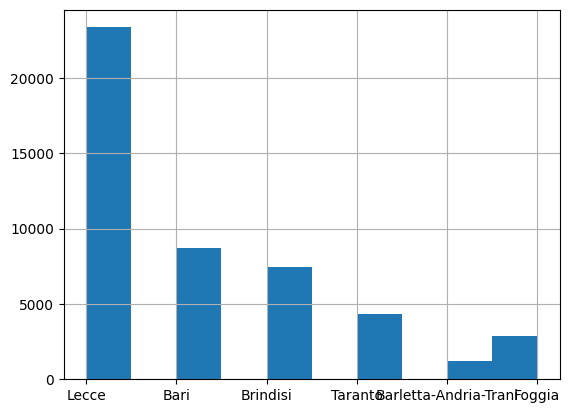

In [131]:
df.neighbourhood_group.hist()

array([[<Axes: title={'center': 'Bari'}>,
        <Axes: title={'center': 'Barletta-Andria-Trani'}>],
       [<Axes: title={'center': 'Brindisi'}>,
        <Axes: title={'center': 'Foggia'}>],
       [<Axes: title={'center': 'Lecce'}>,
        <Axes: title={'center': 'Taranto'}>]], dtype=object)

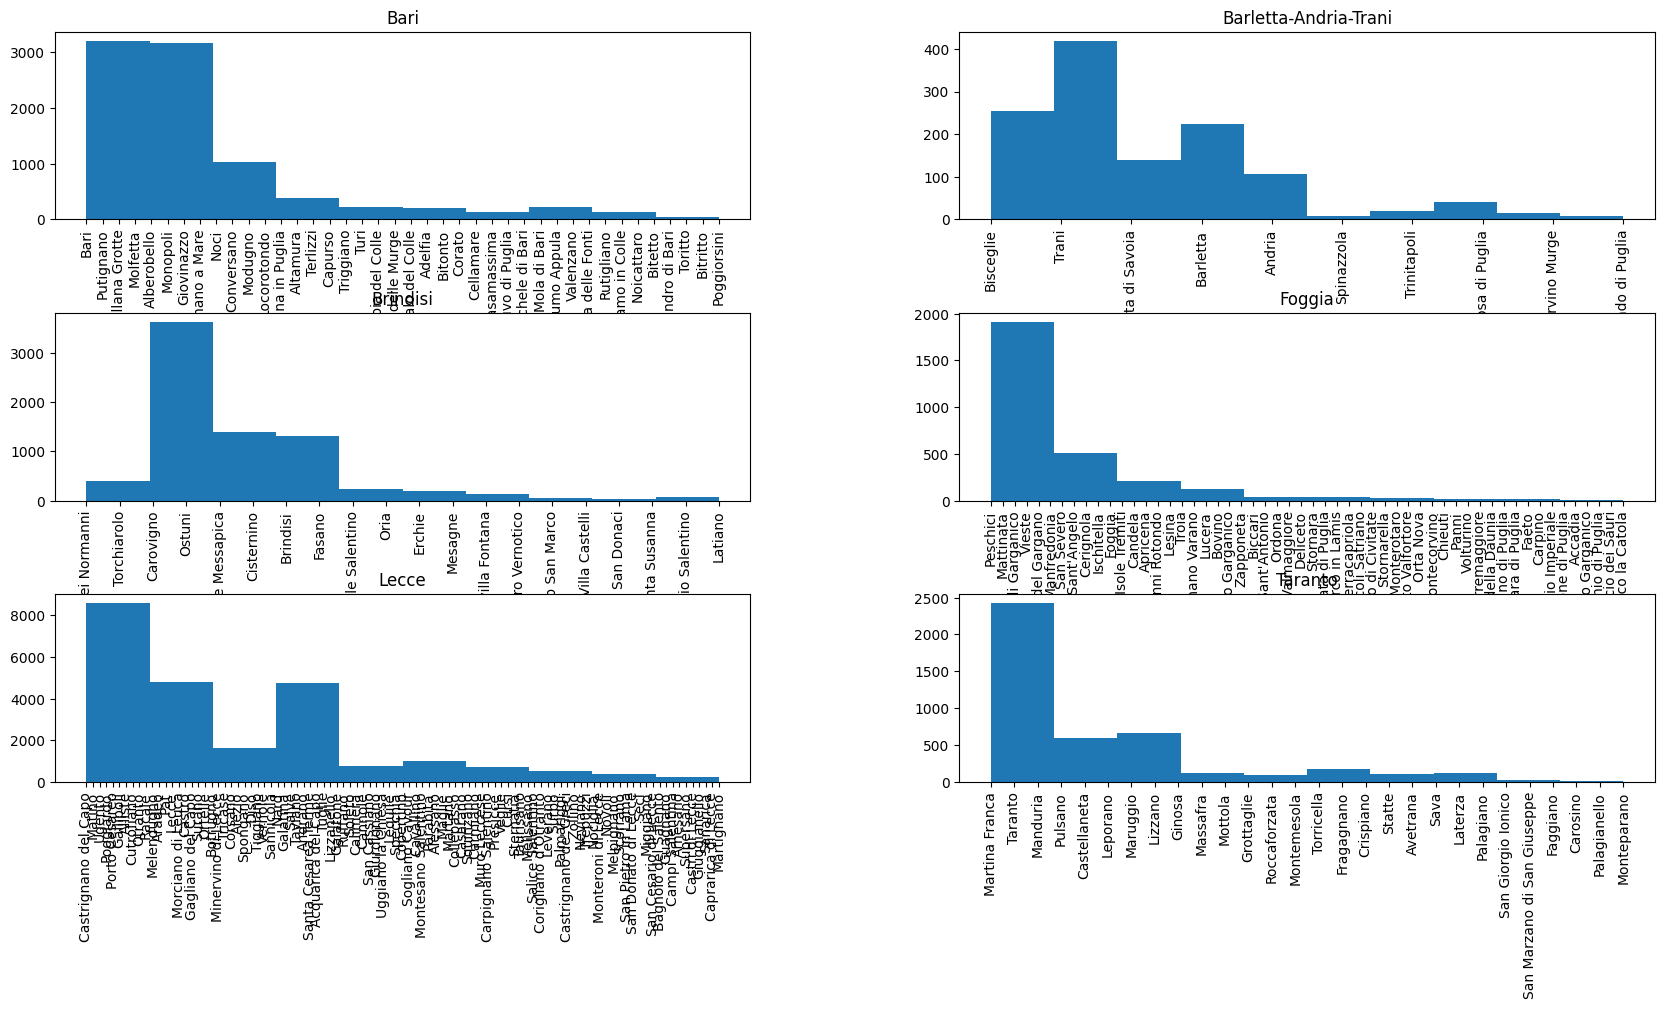

In [133]:
df.hist(by="neighbourhood_group", column="neighbourhood", figsize=(20, 10))

<Axes: >

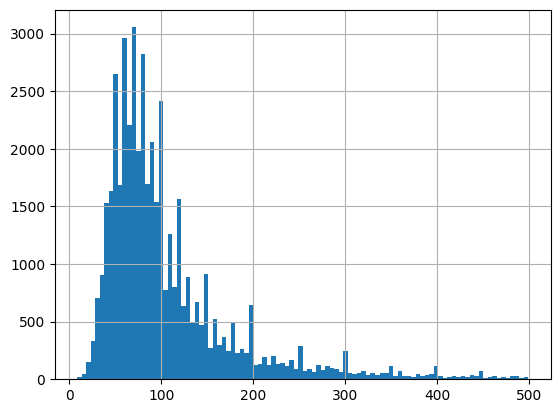

In [140]:
df.loc[df.price < 500].price.hist(bins=100)

<Axes: >

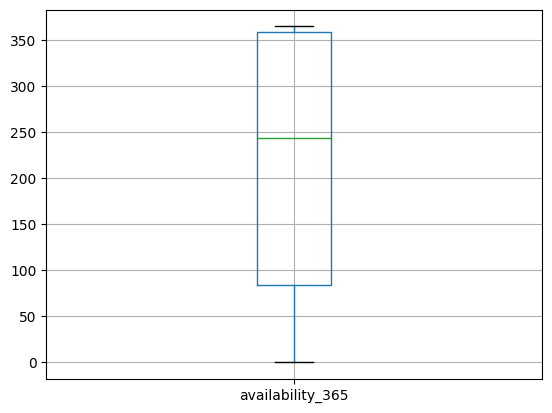

In [142]:
df.boxplot(column="availability_365")

<Axes: title={'center': 'availability_365'}, xlabel='neighbourhood_group'>

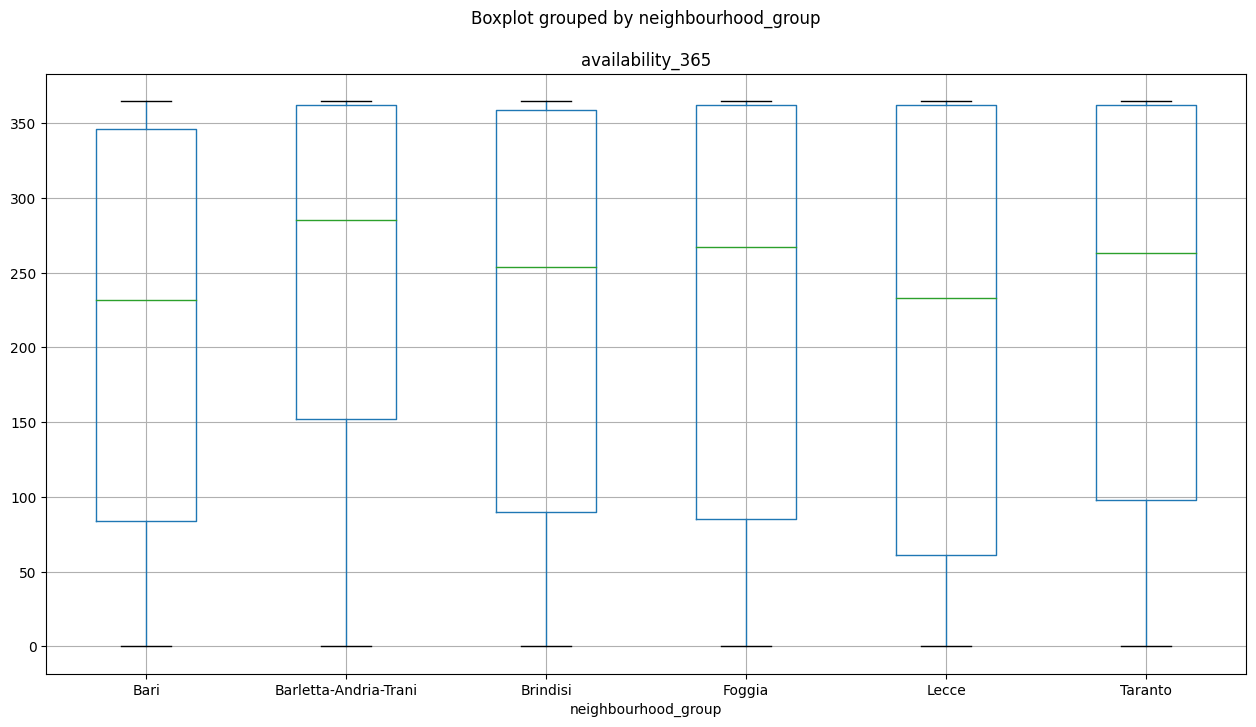

In [147]:
df.boxplot(column="availability_365", by="neighbourhood_group", figsize=(15,8))

<Axes: title={'center': 'price'}, xlabel='neighbourhood_group'>

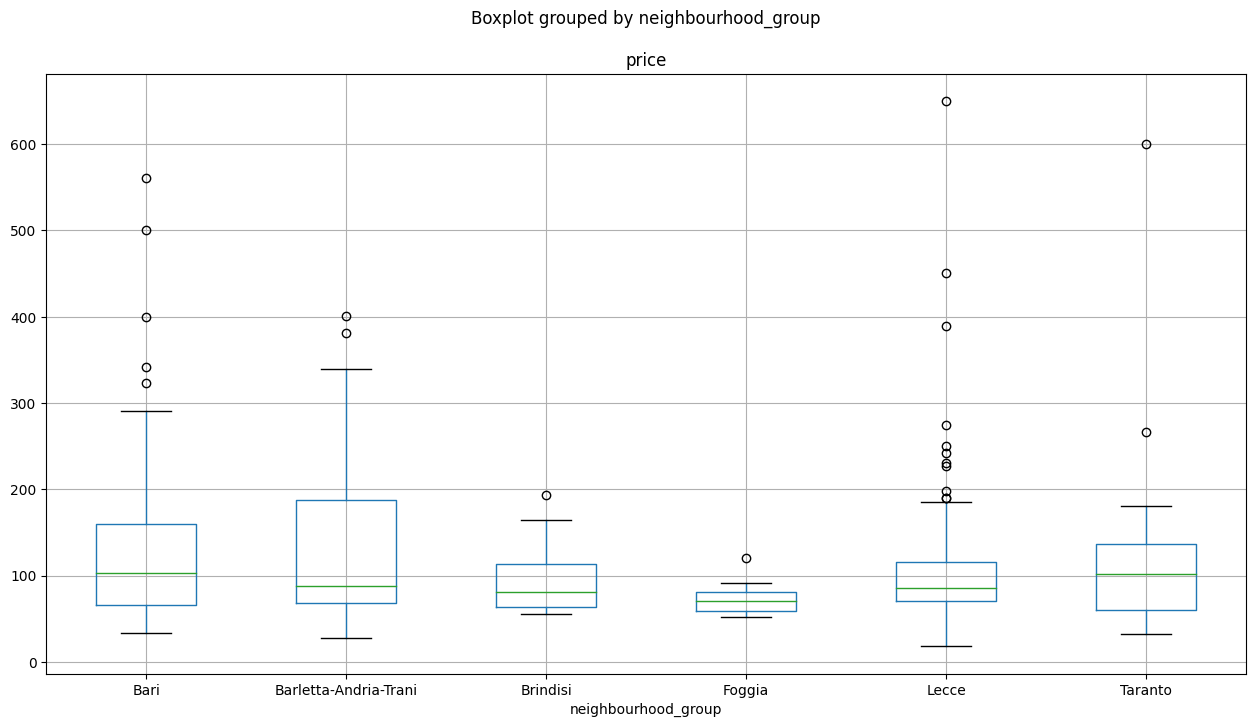

In [151]:
df.loc[(df.room_type == "Hotel room") & (df.price < 1000)].boxplot(column="price", by="neighbourhood_group", figsize=(15,8))

<Axes: xlabel='price', ylabel='number_of_reviews'>

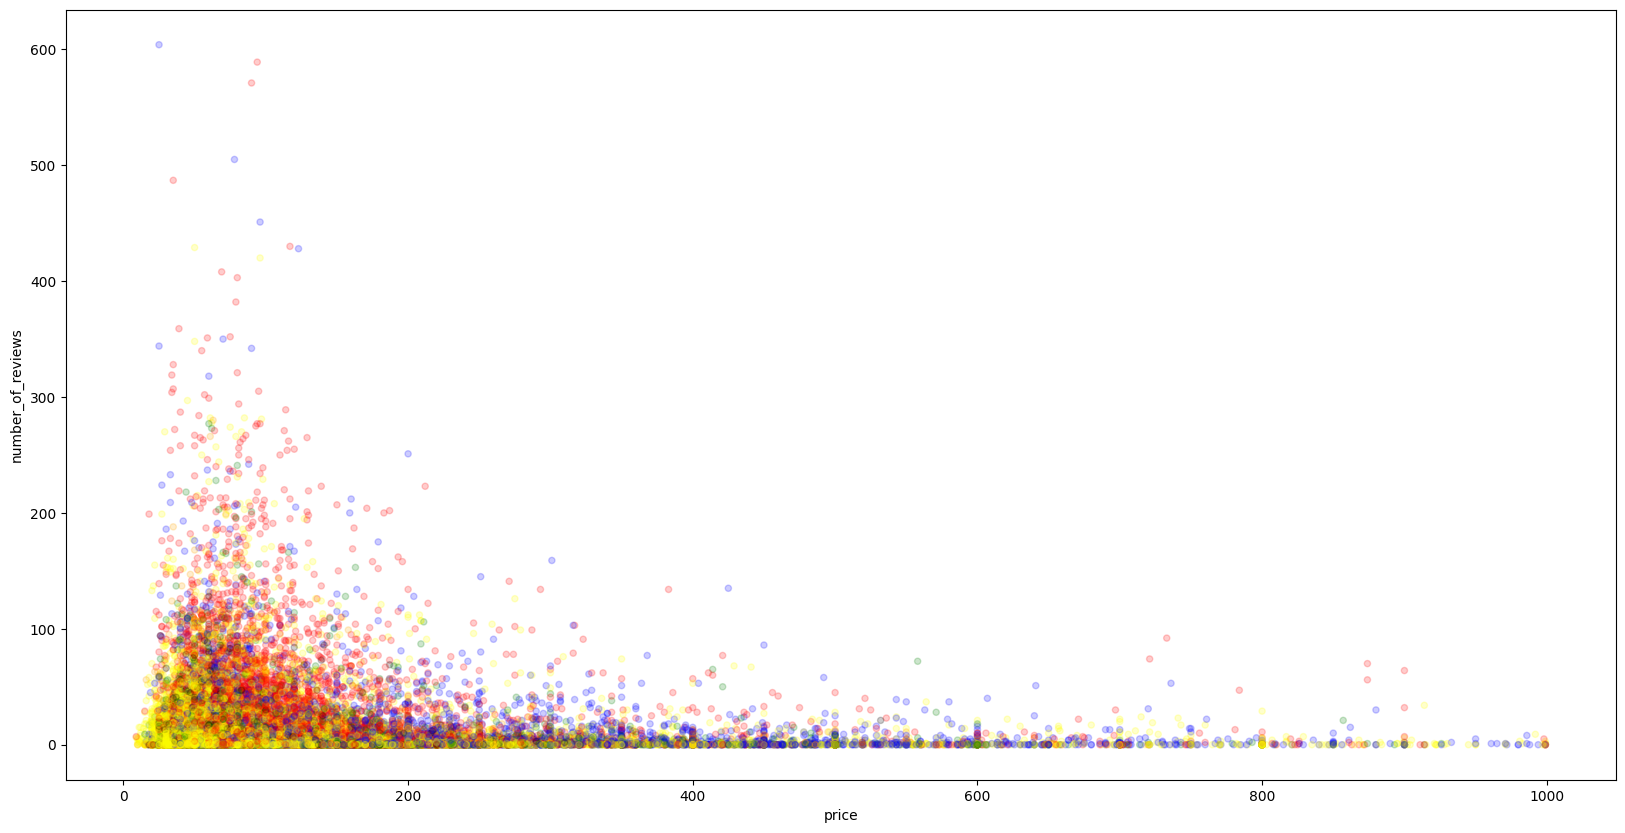

In [169]:
colors = df[df.price < 1000].neighbourhood_group.map({'Lecce': 'yellow', 'Bari': 'red', 'Brindisi':'blue', 'Taranto': 'green', 'Barletta-Andria-Trani':'black','Foggia':'orange'})
df[df.price < 1000].plot.scatter("price", "number_of_reviews", c=colors, alpha=0.2, figsize=(20,10))

<Axes: xlabel='longitude', ylabel='latitude'>

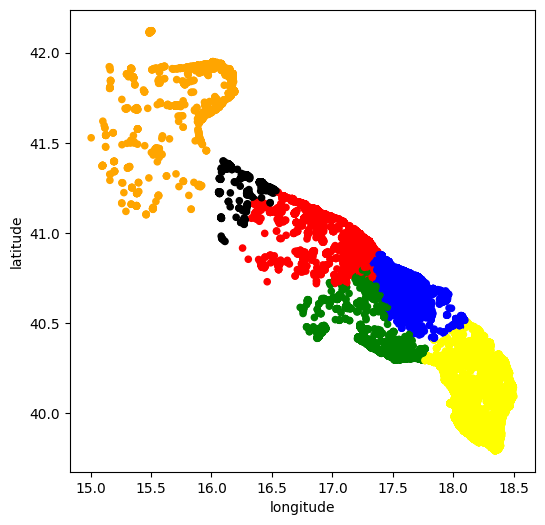

In [177]:
# Exercise: draw the listings as a map, with diffent colors por each neighbourhood_group
colors = df.neighbourhood_group.fillna("Lecce").map({'Lecce': 'yellow', 'Bari': 'red', 'Brindisi':'blue', 'Taranto': 'green', 'Barletta-Andria-Trani':'black','Foggia':'orange'}).values
df.plot.scatter("longitude", "latitude", c=colors, figsize=(6,6))

<Axes: >

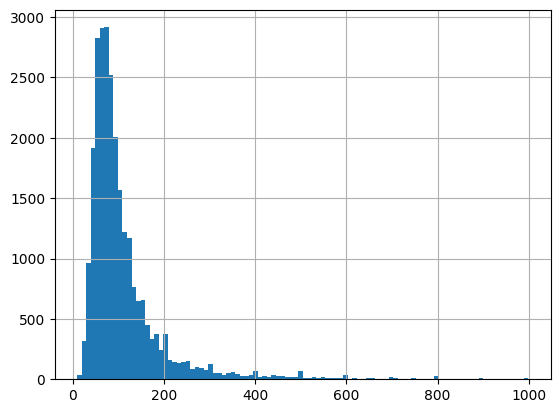

In [184]:
# Prices distribution for listings with minimun nights < 10
#df[(df.minimum_nights < 10) & (df.price < 1000)].price.hist()
df[(df.minimum_nights < 3) & (df.price < 1000)].price.hist(bins=100)